# Dataset Used
<h3>Concrete Strength regression</h3>

<ul>
    <li>Cement (component 1) -- quantitative -- kg in a m3 mixture -- <span style='color : red'>InputVariable</span></li>
    <li>Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- <span style='color : red'>InputVariable</span></li>
    <li>Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- <span style='color : red'>InputVariable</span></li>
    <li>Water (component 4) -- quantitative -- kg in a m3 mixture -- <span style='color : red'>InputVariable</span></li>
    <li>Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- <span style='color : red'>InputVariable</span></li>
    <li>Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- <span style='color : red'>InputVariable</span></li>
    <li>Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- <span style='color : red'>InputVariable</span></li>
    <li>Age -- quantitative -- Day (1~365) -- <span style='color : red'>InputVariable</span></li>
    <li>Concrete compressive strength -- quantitative -- MPa -- <span style='color : red'>OutputVariable</span></li>
<ul>

# Downloading Dataset

In [207]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/maajdl/yeh-concret-data')

Skipping, found downloaded files in ".\yeh-concret-data" (use force=True to force download)


# importing required libraries

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.losses import MeanSquaredError
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import tensorflow

In [209]:
df = pd.read_csv('yeh-concret-data/Concrete_Data_Yeh.csv')

In [210]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [211]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Prefroming EDA

In [213]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


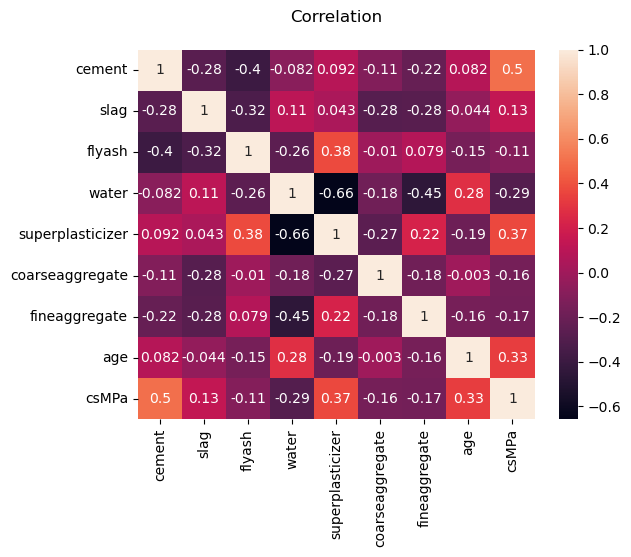

In [214]:
sns.heatmap(df.corr(),annot = True)
plt.title('Correlation',pad=20)
plt.show()

 good relation between cement and csMPa

<Axes: xlabel='cement', ylabel='csMPa'>

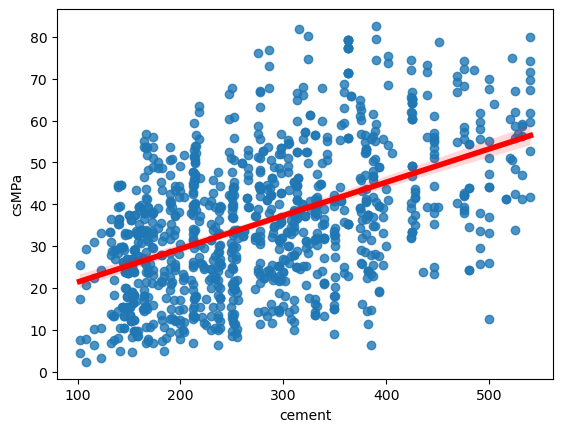

In [215]:
sns.regplot(x = df['cement'],y = df['csMPa'],line_kws={'color':'red','lw':4})

# Splitting and Scaling data

In [216]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [217]:
min_max_scaler = MinMaxScaler()
min_max_scaled_x = min_max_scaler.fit_transform(x)
min_max_scaled_y = min_max_scaler.fit_transform(y.reshape(-1,1))

std_scaler = StandardScaler()
std_scaled_x , std_scaled_y = std_scaler.fit_transform(x) , std_scaler.fit_transform(y.reshape(-1,1))


In [218]:
x_train_min_max , x_test_min_max , y_train_min_max , y_test_min_max = train_test_split(min_max_scaled_x,min_max_scaled_y,test_size=0.2,random_state=42)
x_train_std , x_test_std , y_train_std , y_test_std = train_test_split(std_scaled_x,std_scaled_y,test_size=0.2,random_state=42)

# Linear Regression

In [219]:
model = LinearRegression()
model.fit(x_train_min_max,y_train_min_max)
print('Linear_regression model score for Min Max scaled data : {0:0.4f}'.format(model.score(x_test_min_max,y_test_min_max)))
predictions = model.predict(x_test_min_max)
print('LinearRegression MAE for min max saled data: {0:.4f}'.format(mean_absolute_error(y_test_min_max, predictions)))
print('LinearRegression MSE for min max saled data: {0:.4f}'.format(mean_squared_error(y_test_min_max, predictions)))

model.fit(x_train_std,y_train_std)
print('Linear_regression model score for standered scaled data : {0:0.4f}'.format(model.score(x_test_std,y_test_std)))
predictions = model.predict(x_test_min_max)
print('LinearRegression MAE for std saled data: {0:.4f}'.format(mean_absolute_error(y_test_min_max, predictions)))
print('LinearRegression MSE for std max saled data: {0:.4f}'.format(mean_squared_error(y_test_min_max, predictions)))

Linear_regression model score for Min Max scaled data : 0.6276
LinearRegression MAE for min max saled data: 0.0965
LinearRegression MSE for min max saled data: 0.0149
Linear_regression model score for standered scaled data : 0.6276
LinearRegression MAE for std saled data: 0.1776
LinearRegression MSE for std max saled data: 0.0442


# SVR(support vector regressor)

In [220]:
model = SVR()
model.fit(x_train_min_max,y_train_min_max)
print('SVR_regression model score for Min Max scaled data : {0:0.4f}'.format(model.score(x_test_min_max,y_test_min_max)))
model.fit(x_train_std,y_train_std)
print('SVR_regression model score for standered scaled data : {0:0.4f}'.format(model.score(x_test_std,y_test_std)))



SVR_regression model score for Min Max scaled data : 0.8038
SVR_regression model score for standered scaled data : 0.8254


c:\anaconda\envs\ml\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\envs\ml\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KNN Regressor

In [221]:
model = KNeighborsRegressor()
model.fit(x_train_min_max,y_train_min_max)
print('KNN_regression model score for Min Max scaled data : {0:0.4f}'.format(model.score(x_test_min_max,y_test_min_max)))
model.fit(x_train_std,y_train_std)
print('KNN_regression model score for standered scaled data : {0:0.4f}'.format(model.score(x_test_std,y_test_std)))
 

KNN_regression model score for Min Max scaled data : 0.6845
KNN_regression model score for standered scaled data : 0.7093


# Decision Tree Regressor

In [222]:
model = DecisionTreeRegressor()
model.fit(x_train_min_max,y_train_min_max)
print('Decision_tree_regression model score for Min Max scaled data : {0:0.4f}'.format(model.score(x_test_min_max,y_test_min_max)))
model.fit(x_train_std,y_train_std)
print('Decision_tree_regression model score for standered scaled data : {0:0.4f}'.format(model.score(x_test_std,y_test_std)))
 

Decision_tree_regression model score for Min Max scaled data : 0.8268
Decision_tree_regression model score for standered scaled data : 0.8154


# Regression using Deep Nural Network

In [223]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [224]:
mse = MeanSquaredError()
model = Sequential()
model.add(Dense(8,input_dim = 8,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(
    loss=mse, 
    optimizer='adam',
    metrics=['mae']
)

In [225]:
with tensorflow.device('/GPU:0'):
    history = model.fit(x_train_scaled,y_train,
        epochs=100,
        validation_split=0.2
    )

Epoch 1/100
21/21 [==============================] - 1s 17ms/step - loss: 1427.4015 - mae: 33.4185 - val_loss: 1147.6144 - val_mae: 29.8467
Epoch 2/100
21/21 [==============================] - 0s 11ms/step - loss: 804.2977 - mae: 22.8441 - val_loss: 536.8984 - val_mae: 18.6500
Epoch 3/100
21/21 [==============================] - 0s 11ms/step - loss: 545.7502 - mae: 18.7175 - val_loss: 431.5648 - val_mae: 16.1115
Epoch 4/100
21/21 [==============================] - 0s 11ms/step - loss: 423.9571 - mae: 16.3409 - val_loss: 323.2355 - val_mae: 14.4365
Epoch 5/100
21/21 [==============================] - 0s 11ms/step - loss: 358.8681 - mae: 15.1057 - val_loss: 282.1999 - val_mae: 13.4313
Epoch 6/100
21/21 [==============================] - 0s 12ms/step - loss: 301.3545 - mae: 13.8710 - val_loss: 252.2693 - val_mae: 12.6245
Epoch 7/100
21/21 [==============================] - 0s 12ms/step - loss: 266.5027 - mae: 12.9775 - val_loss: 209.6295 - val_mae: 11.5760
Epoch 8/100
21/21 [=============

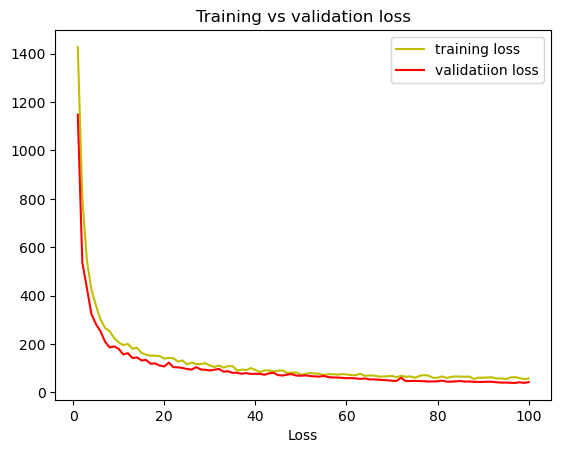

In [226]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label = 'training loss')
plt.plot(epochs,val_loss,'r',label = 'validatiion loss')
plt.title('Training vs validation loss')
plt.xlabel('epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

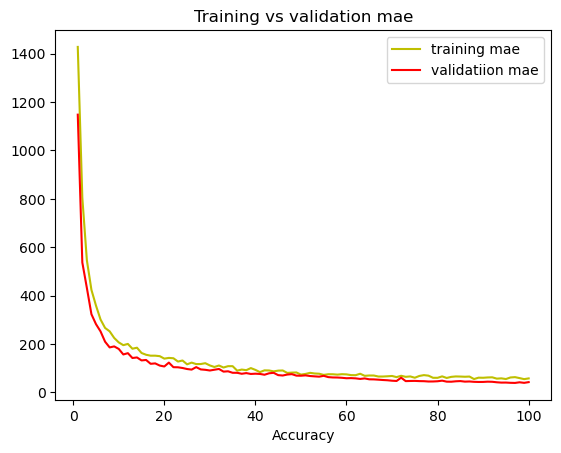

In [227]:
acc = history.history['mae']
val_acc = history.history['val_mae']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label = 'training mae')
plt.plot(epochs,val_loss,'r',label = 'validatiion mae')
plt.title('Training vs validation mae')
plt.xlabel('epochs')
plt.xlabel('Accuracy')
plt.legend()
plt.show()

In [228]:
mse , mae = model.evaluate(x_test_scaled,y_test)
print('mean_squared_error = {:0.4f}'.format(mse))
print('mean_absolute_error = {:0.4f}'.format(mae))

7/7 [==============================] - 0s 4ms/step - loss: 55.5571 - mae: 5.6211
mean_squared_error = 55.5571
mean_absolute_error = 5.6211


In [232]:

predict = model.predict(x_test_scaled)
bias = abs((sum(y_test)+sum(predict))/sum(y_test))
print('bias = {:0.4f}%'.format(bias[0]))
# bias = how far is result


7/7 [==============================] - 0s 4ms/step
bias = 1.9702%


2/2 [==============================] - 0s 4ms/step


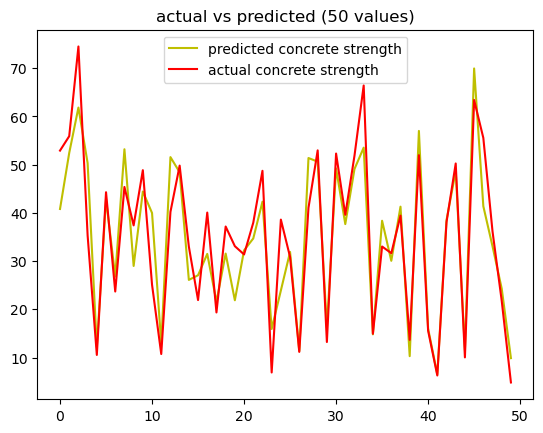

In [230]:

predict = model.predict(x_test_scaled[:50])
plt.plot(predict,'y',label = 'predicted concrete strength')
plt.plot(y_test[:50],'r',label = 'actual concrete strength')
plt.title('actual vs predicted (50 values)')
plt.legend()
plt.show()

# Tkinter GUI

In [231]:
# from tkinter import Tk , Label , Entry , Button
# root = Tk()
# root.title = 'Comcrete Strength'

# cement_lbl = Label(root,text='Cement')
# cement_lbl.grid(row=0,column=0)
# cement_ip = Entry(root)
# cement_ip.grid(row=0,column=1)

# slag_lbl = Label(root,text='slag')
# slag_lbl.grid(row=1,column=0)
# slag_ip = Entry(root)
# slag_ip.grid(row=1,column=1)

# flyash_lbl = Label(root,text='flyash')
# flyash_lbl.grid(row=2,column=0)
# flyash_ip = Entry(root)
# flyash_ip.grid(row=2,column=1)

# water_lbl = Label(root,text='water')
# water_lbl.grid(row=3,column=0)
# water_ip = Entry(root)
# water_ip.grid(row=3,column=1)

# superplasticizer_lbl = Label(root,text='superplasticizer')
# superplasticizer_lbl.grid(row=4,column=0)
# superplasticizer_ip = Entry(root)
# superplasticizer_ip.grid(row=4,column=1)

# coarseaggregate_lbl = Label(root,text='coarseaggregate')
# coarseaggregate_lbl.grid(row=5,column=0)
# coarseaggregate_ip = Entry(root)
# coarseaggregate_ip.grid(row=5,column=1)

# fineaggregate_lbl = Label(root,text='fineaggregate')
# fineaggregate_lbl.grid(row=6,column=0)
# fineaggregate_ip = Entry(root)
# fineaggregate_ip.grid(row=6,column=1)

# age_lbl = Label(root,text='age')
# age_lbl.grid(row=7,column=0)
# age_ip = Entry(root)
# age_ip.grid(row=7,column=1)

# def result():
#     cement , slag , flyash , water , superplasticizer , coarseaggregate , fineaggregate , age = cement_ip.get(),slag_ip.get(),flyash_ip.get(),water_ip.get(),superplasticizer_ip.get(),coarseaggregate_ip.get(),fineaggregate_ip.get(),age_ip.get()
#     lst = [cement , slag , flyash , water , superplasticizer , coarseaggregate , fineaggregate , age]
#     ip = []
#     for i in lst:
#         ip.append(float(i))
#     ip[7]=int(ip[7])
#     ip = np.asarray(ip)
#     scaler = StandardScaler()
#     ip = scaler.fit_transform(ip.reshape(-1,1))
#     input_data = []
#     for i in ip:
#         input_data.append(i[0])
#     res = model.predict([input_data])
#     ans.config(text=res[0][0])
#     print(res)

# calculate_strength = Button(root,text = 'calculate Strength',command=result)
# calculate_strength.grid(row=8,columnspan=2)

# ans = Label(root,text='')
# ans.grid(row=9,columnspan=2)


# root.mainloop()